In [4]:
# dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from datetime import datetime
from config import weather_api_key
from citipy import citipy

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# unzip lat_lngs
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [9]:
# building API request URL
url = "https://api.openweathermap.org/data/2.5/weather?" + "&appid=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | waipawa
Processing Record 3 of Set 1 | taoudenni
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | portland
Processing Record 6 of Set 1 | harper
Processing Record 7 of Set 1 | chauk
Processing Record 8 of Set 1 | samana
Processing Record 9 of Set 1 | stornoway
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | ust-maya
Processing Record 12 of Set 1 | belaya gora
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | soledar
Processing Record 15 of Set 1 | alvand
Processing Record 16 of Set 1 | port hardy
Processing Record 17 of Set 1 | ponta delgada
Processing Record 18 of Set 1 | tuatapere
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | isangel
Processing Record 21 of Set 1 | airai
Processing Record 22 of Set 1 | mataura
Processing Re

In [12]:
# confirm dataset size is >=500
len(city_data)

556

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Waipawa,-41.4122,175.5153,287.98,58,96,2.25,NZ,2022-09-27 01:23:09
1,Taoudenni,22.6783,-3.9836,308.04,20,58,2.18,ML,2022-09-27 01:26:34
2,Ushuaia,-54.8000,-68.3000,277.96,70,40,9.77,AR,2022-09-27 01:23:35
3,Portland,45.5234,-122.6762,304.78,40,0,2.57,US,2022-09-27 01:25:47
4,Harper,4.3750,-7.7169,297.34,90,100,2.47,LR,2022-09-27 01:26:35
5,Chauk,20.8833,94.8167,299.55,83,83,3.32,MM,2022-09-27 01:26:36
6,Samana,19.2056,-69.3369,299.24,86,9,3.53,DO,2022-09-27 01:26:37
7,Stornoway,58.2093,-6.3865,281.13,83,75,8.23,GB,2022-09-27 01:26:37
8,Cape Town,-33.9258,18.4232,285.44,83,20,1.54,ZA,2022-09-27 01:22:33
9,Ust-Maya,60.4167,134.5333,275.20,99,100,0.92,RU,2022-09-27 01:26:38


In [14]:
# reorder city_data_df columns
reordered_col = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reordered_col]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Waipawa,NZ,2022-09-27 01:23:09,-41.4122,175.5153,287.98,58,96,2.25
1,Taoudenni,ML,2022-09-27 01:26:34,22.6783,-3.9836,308.04,20,58,2.18
2,Ushuaia,AR,2022-09-27 01:23:35,-54.8000,-68.3000,277.96,70,40,9.77
3,Portland,US,2022-09-27 01:25:47,45.5234,-122.6762,304.78,40,0,2.57
4,Harper,LR,2022-09-27 01:26:35,4.3750,-7.7169,297.34,90,100,2.47


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

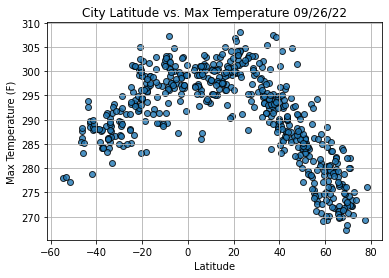

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig1.png")

# Show plot.
plt.show()

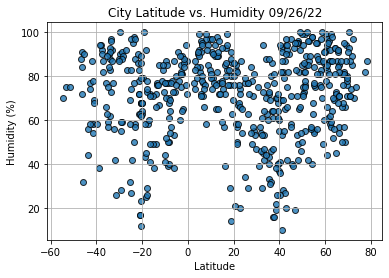

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/fig2.png")
# Show plot.
plt.show()

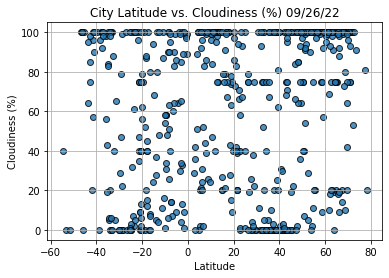

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/fig3.png")
# Show plot.
plt.show()

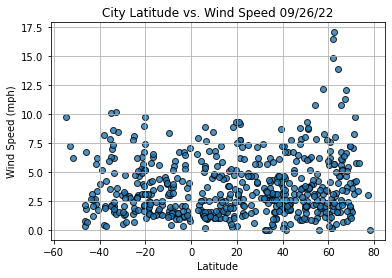

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()